In [18]:
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statistics as stat

In [19]:
with open("mpd.slice.0-999.json",'r') as json_file:
    mpd=json.load(json_file)

with open("Vetting_Playlist.json",'r') as json_file:
    vetting=json.load(json_file)

with open("albums_0-999.json",'r') as json_file:
    albums=json.load(json_file)

with open("artists_0-999.json",'r') as json_file:
    artists=json.load(json_file)
    
with open("songs_0-999.json",'r') as json_file:
    songs=json.load(json_file)

In [20]:
#Create library with artists and their genres
#1First stuff(load file)
#2
artist_dict={"name":[],"genres":[]}
for ID in artists:
    artist_dict["name"].append(artists[ID]["name"])
    artist_dict["genres"].append(artists[ID]["genres"])
#3
data_art={}
for ID in artists:
    if artists[ID]["genres"]==list:
        data_art[artists[ID]["name"]]=artists[ID]["genres"]
    else:
        data_art[artists[ID]["name"]]=[artists[ID]["genres"]]

In [21]:
for songID in songs:
    print(songID)
songs["0UaMYEvWZi0ZqiDOoHU3YI"]

0UaMYEvWZi0ZqiDOoHU3YI
6I9VzXrHxO9rA9A5euc8Ak
0WqIKmW4BTrj3eJFmnCKMv
1AWQoqb9bSvzTjaLralEkT
1lzr43nnXAijIGYnCT8M8H
0XUfyU2QviPAs6bxSpXYG4
68vgtRHr7iZHpzGpon6Jlo
3BxWKCI06eQ5Od8TY2JBeA
7H6ev70Weq6DdpZyyTmUXk
2PpruBYCo4H7WOBJ7Q2EwM
2gam98EZKrF9XuOkU13ApN
4Y45aqo9QMa57rDsAJv40A
1HwpWwa6bnqqRhK8agG4RS
20ORwCJusz4KS2PbTPVNKo
7k6IzwMGpxnRghE7YosnXT
1Bv0Yl01xBDZD4OQP93fyl
4omisSlTk6Dsq2iQD7MA07
7xYnUQigPoIDAMPVK79NEq
6d8A5sAx9TfdeseDvfWNHd
4pmc2AxSEq6g7hPVlJCPyP
215JYyyUnrJ98NK3KEwu6d
0uqPG793dkDDN7sCUJJIVC
19Js5ypV6JKn4DMExHQbGc
1JURww012QnWAw0zZXi6Aa
7DFnq8FYhHMCylykf6ZCxA
1TfAhjzRBWzYZ8IdUV3igl
1Y4ZdPOOgCUhBcKZOrUFiS
6MjljecHzHelUDismyKkba
67T6l4q3zVjC5nZZPXByU8
34ceTg8ChN5HjrqiIYCn9Q
5Q0Nhxo0l2bP3pNjpGJwV1
6GIrIt2M39wEGwjCQjGChX
4E5P1XyAFtrjpiIxkydly4
3H1LCvO3fVsK2HPguhbml0
3uoQULcUWfnt6nc6J7Vgai
2nbClS09zsIAqNkshg6jnp
69ghzc538EQSVon2Gm3wrr
1kusepF3AacIEtUTYrw4GV
7oK9VyNzrYvRFo7nQEYkWN
12qZHAeOyTf93YAWvGDTat
2jFlMILIQzs7lSFudG9lbo
4I2GqMe7L2ccMpUbnDzYLH
5lDriBxJd22IhOH9zTcFrV
2eJ8ij1T3cN

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2wIVse2owClT7go1WT98tk'},
    'href': 'https://api.spotify.com/v1/artists/2wIVse2owClT7go1WT98tk',
    'id': '2wIVse2owClT7go1WT98tk',
    'name': 'Missy Elliott',
    'type': 'artist',
    'uri': 'spotify:artist:2wIVse2owClT7go1WT98tk'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM'

In [22]:
x=0
for mpdData in mpd["playlists"][1]:
    if x<50:
        print(mpdData)
    x+=1

name
collaborative
pid
modified_at
num_tracks
num_albums
num_followers
tracks
num_edits
duration_ms
num_artists


67.503

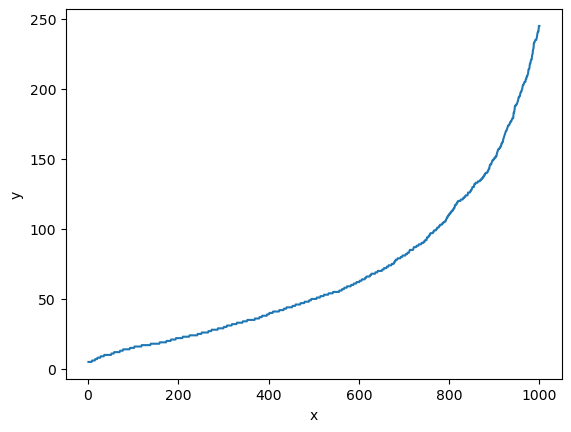

In [23]:
y=[]
for mpdNum in range(len(mpd["playlists"])):
    y.append(len(mpd["playlists"][mpdNum]["tracks"]))
df=pd.DataFrame({"x":range(1,len(y)+1),"y":sorted(y)})#sorted(y)

sns.lineplot(data=df,x='x',y='y')
plt.xlabel("x")
plt.ylabel("y")
stat.mean(y)